# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.3MB/s 


In [3]:
%matplotlib inline


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio.plotly import plotly #changed to 'chart_studio.plotly' since it was showing an error in plotly.
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Assign/train_data.csv', nrows= 50000) #cosidering 80k rows
resource_data = pd.read_csv('/content/drive/My Drive/Assign/resources.csv')

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [8]:
project_data.head(2)

Unnamed: 0       id  ...  price quantity
0      160221  p253737  ...  154.6       23
1      140945  p258326  ...  299.0        1

[2 rows x 19 columns]

In [9]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id  ...   price quantity
473        100660  p234804  ...  481.04        9
41558       33679  p137682  ...   17.74       14

[2 rows x 19 columns]

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
project_data.head(2)

Unnamed: 0  ...                                              essay
473        100660  ...  I recently read an article about giving studen...
41558       33679  ...  My students crave challenge, they eat obstacle...

[2 rows x 20 columns]

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

I teach in an elementary school that is a 4th / 5th grade building in a small town in central Illinois. Next year I will be teaching three different classes of students reading and language / writing / spelling. In my classroom, my students enjoy a variety of activities including hands-on and collaborative learning in order to help make the information real and interesting to them while giving them a reason to practice.\r\n\r\nOur students are a wide-variety of students at our school with over 60% of our students receiving free lunch. Because of this low-income percentage, our students often require additional help and support to help make their learning valuable and real-world to them. Our teachers work hard to collaborate in order to help all of our students achieve at their highest level.\r\n\r\nOur community is very supportive of our schools, but lately because of lower levels of state support many local businesses have cut back on individual assistance for classrooms.  In order to

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach in an elementary school that is a 4th / 5th grade building in a small town in central Illinois. Next year I will be teaching three different classes of students reading and language / writing / spelling. In my classroom, my students enjoy a variety of activities including hands-on and collaborative learning in order to help make the information real and interesting to them while giving them a reason to practice.    Our students are a wide-variety of students at our school with over 60% of our students receiving free lunch. Because of this low-income percentage, our students often require additional help and support to help make their learning valuable and real-world to them. Our teachers work hard to collaborate in order to help all of our students achieve at their highest level.    Our community is very supportive of our schools, but lately because of lower levels of state support many local businesses have cut back on individual assistance for classrooms.  In order to continu

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach in an elementary school that is a 4th 5th grade building in a small town in central Illinois Next year I will be teaching three different classes of students reading and language writing spelling In my classroom my students enjoy a variety of activities including hands on and collaborative learning in order to help make the information real and interesting to them while giving them a reason to practice Our students are a wide variety of students at our school with over 60 of our students receiving free lunch Because of this low income percentage our students often require additional help and support to help make their learning valuable and real world to them Our teachers work hard to collaborate in order to help all of our students achieve at their highest level Our community is very supportive of our schools but lately because of lower levels of state support many local businesses have cut back on individual assistance for classrooms In order to continue some of our learning p

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## Preprocessing of Teacher Prefix

In [20]:
#https://stackoverflow.com/questions/22623375/python-remove-all-decimals-from-a-float

from tqdm import tqdm
preprocessed_prefix = []
# tqdm is for printing the status bar
for prefix in tqdm(project_data['teacher_prefix'].values):
    prefix=str(prefix).split('.')[0]
    preprocessed_prefix.append(prefix.lower().strip())

100%|██████████| 50000/50000 [00:00<00:00, 1017807.67it/s]


In [0]:
#Replacing the default teacher prefix column with preprocessed_prefix
# Find the name of the column by index
n = project_data.columns[3]

# Drop  that column
project_data.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
project_data[n] = preprocessed_prefix

## Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state', 'Date',
       'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'teacher_prefix'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Seperating X and Ys:

In [23]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

Unnamed: 0  ... teacher_prefix
473      100660  ...            mrs

[1 rows x 19 columns]

### Preprocessing Text data

#### Preprocessing of essays split data i.e Train, Test and cv

In [24]:
# Combining all the relevant codes for processing of text data
from tqdm import tqdm
train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:27<00:00, 1829.19it/s]


#### Preprocessing of titles of split data i.e train, test and cv

In [25]:
# Combining all the relevant codes for processing of text data
from tqdm import tqdm
train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    train_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 43106.99it/s]


In [26]:
train_preprocessed_titles[0]

'flexible seating flexible learning'

### Encoding

### encoding numerical features: Price

In [27]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['price'].values.reshape(-1,1))

X_price_norm = normalizer.transform(X['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_price_norm.shape, y.shape)
print("="*100)

After vectorizations
(50000, 1) (50000,)


### Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### Categories using train, test and cv data.

#### Vectorizng Categorical Data (categories)

In [28]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#using train data
X_categories_one_hot = vectorizer.fit_transform(X['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


#### Vectorizng Categorical Data (sub_categories)

In [29]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
X_sub_categories_one_hot = vectorizer.fit_transform(X['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


#### Vectorizing States

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter= Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [31]:
school_state_dict= dict(my_counter)
sorted_school_state_dict= dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
print (sorted_school_state_dict)

{'VT': 32, 'WY': 51, 'ND': 63, 'MT': 106, 'RI': 126, 'NH': 141, 'SD': 142, 'NE': 144, 'AK': 153, 'DE': 155, 'WV': 218, 'ME': 222, 'NM': 236, 'HI': 239, 'DC': 247, 'KS': 285, 'ID': 302, 'IA': 306, 'AR': 446, 'CO': 538, 'MN': 556, 'OR': 577, 'MS': 598, 'KY': 614, 'NV': 665, 'MD': 668, 'TN': 774, 'CT': 774, 'AL': 790, 'UT': 792, 'WI': 833, 'VA': 916, 'AZ': 994, 'NJ': 1005, 'OK': 1074, 'MA': 1076, 'LA': 1094, 'WA': 1103, 'MO': 1166, 'IN': 1171, 'OH': 1180, 'PA': 1419, 'MI': 1468, 'GA': 1828, 'SC': 1830, 'IL': 1967, 'NC': 2340, 'FL': 2839, 'TX': 3320, 'NY': 3393, 'CA': 7024}


In [32]:
vectorizer = CountVectorizer(vocabulary= list(sorted_school_state_dict.keys()))
vectorizer.fit(project_data['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_state_ohe = vectorizer.transform(X['school_state'].values)

print("After vectorizations")
print(X_state_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(50000, 51) (50000,)
['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']


#### Vectorizing teacher prefix

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_teacher_ohe = vectorizer.transform(X['teacher_prefix'].values)

print("After vectorizations")
print(X_teacher_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(50000, 6) (50000,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


#### Vectorizing of project grades

In [0]:
my_counter= Counter()
for project_grade in project_data['project_grade_category'].values:
    project_grade = project_grade.replace('Grades', '')#since we don't wan't 'Grades' as categor
    project_grade = project_grade.replace ('-', 'to')#no special charachters
    my_counter.update(project_grade.split())

In [35]:
print (my_counter)

Counter({'PreKto2': 20316, '3to5': 16968, '6to8': 7750, '9to12': 4966})


In [0]:
project_grade_cat= dict(my_counter)
sorted_project_grade_cat_dict= dict(sorted(project_grade_cat.items(), key=lambda kv:kv[1]))

In [37]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X['project_grade_category'].values)
print(vectorizer.get_feature_names())

X_grade_ohe=vectorizer.transform(X['project_grade_category'].values)

project_grade_categories_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_categories_one_hot.shape)

['9to12', '6to8', '3to5', 'PreKto2']
Shape of matrix after one hot encodig  (50000, 4)


In [38]:
print("After vectorizations")
print(X_grade_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(50000, 4) (50000,)
['9to12', '6to8', '3to5', 'PreKto2']


### Vectorizing Text data

#### Bag of words on essays

In [39]:
ex = ["classroom students should take break",
"low income homes students receive free breakfast",
"students will receive low grades"]
vectorizer = CountVectorizer()
vectorizer.fit(ex)
print(vectorizer.transform(ex).toarray())
print(vectorizer.get_feature_names())

[[1 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 1]]
['break', 'breakfast', 'classroom', 'free', 'grades', 'homes', 'income', 'low', 'receive', 'should', 'students', 'take', 'will']


In [40]:
print(X.shape, y.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_essay_bow = vectorizer.transform(train_preprocessed_essays)

print("After vectorizations")
print(X_essay_bow.shape, y.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# X_bow = vectorizer.fit_transform(X['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(X_bow.shape, y.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")

(50000, 19) (50000,)
After vectorizations
(50000, 12101) (50000,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


#### Bag of Words on Titles

In [41]:
print(X.shape, y.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_title_bow = vectorizer.transform(train_preprocessed_titles)

print("After vectorizations")
print(X_title_bow.shape, y.shape)
print("="*100)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")

(50000, 19) (50000,)
After vectorizations
(50000, 2142) (50000,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


### Vectorizing Numerical features

#### Price

In [42]:
X.head(1)

Unnamed: 0  ... teacher_prefix
473      100660  ...            mrs

[1 rows x 19 columns]

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_price_standardized = price_scalar.transform(X['price'].values.reshape(-1, 1))

Mean : 299.3336762, Standard deviation : 378.20927190421384


In [44]:
train_price_standardized

array([[ 0.48043858],
       [-0.74454461],
       [-0.52043588],
       ...,
       [ 0.08338326],
       [-0.08134035],
       [ 0.26352163]])

#### previous projects

In [45]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.
# preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

previous_projects_scalar = StandardScaler()
previous_projects_scalar.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {previous_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(previous_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_previous_projects_standardized = previous_projects_scalar.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
train_previous_projects_standardized

Mean : 11.24934, Standard deviation : 28.156843032634182


array([[-0.3284935 ],
       [-0.3284935 ],
       [-0.18643212],
       ...,
       [ 1.41175841],
       [-0.29297816],
       [-0.39952419]])

#### Quantity

In [46]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(X['quantity'].values.reshape(-1,1))
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_quantity_standardized = quantity_scalar.transform(X['quantity'].values.reshape(-1, 1))
train_quantity_standardized

Mean : 17.05642, Standard deviation : 26.807615275954706


array([[-0.30052729],
       [-0.11401313],
       [-0.22592162],
       ...,
       [-0.11401313],
       [-0.26322446],
       [-0.44973862]])

## Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [47]:
#checking of number of rows are same
print (X_title_bow.shape)
print (X_essay_bow.shape)
print (train_previous_projects_standardized.shape)
print (train_price_standardized.shape)
print (train_quantity_standardized.shape)
print (X_teacher_ohe.shape)
print (X_categories_one_hot.shape)
print (X_sub_categories_one_hot.shape)
print (X_grade_ohe.shape)
print (X_state_ohe.shape)

(50000, 2142)
(50000, 12101)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 6)
(50000, 9)
(50000, 30)
(50000, 4)
(50000, 51)


### Making sets for BOW:

#### Set 1 for BOW:

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_train = hstack((X_title_bow,X_essay_bow,train_previous_projects_standardized
                       ,train_price_standardized,train_quantity_standardized,X_teacher_ohe,
                       X_categories_one_hot,X_sub_categories_one_hot,X_grade_ohe,
                       X_state_ohe)).toarray()

In [49]:
print (X_set1_train.shape)

(50000, 14346)


# Assignment 10: Clustering on Bag Of Words:

# K-means Clustering:

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
np.seterr(divide='ignore', invalid='ignore')

X_top_feat = SelectKBest(f_classif ,k=5000).fit_transform(X_set1_train, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning:

Features [   26    27    54    55    64    73    78    82    89   101   103   111
   113   152   158   163   169   176   253   257   269   493   518   521
   522   523   524   533   555   557   643   710   765   788   879   889
   890   891   908   938   949   965  1015  1025  1026  1028  1030  1042
  1148  1218  1261  1263  1295  1296  1298  1332  1333  1338  1339  1341
  1342  1347  1348  1352  1361  1374  1376  1377  1378  1383  1386  1557
  1639  1715  1716  1742  1754  1921  1922  1923  1926  1927  1928  1929
  1931  1932  1933  1940  1941  1947  1961  1966  2007  2015  2026  2027
  2057  2064  2072  2073  2074  2075  2076  2080  2082  2091  2100  2108
  2135  2137  2138 14291 14292 14293 14294 14295 14296 14297 14298 14299
 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311
 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323
 14324

In [0]:
X_top_feat.shape

(50000, 5000)

 11%|█         | 1/9 [00:50<06:47, 50.93s/it]/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

100%|██████████| 9/9 [50:49<00:00, 338.81s/it]


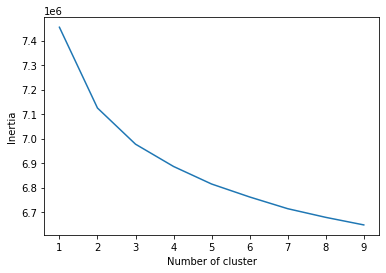

In [0]:
from sklearn.cluster import KMeans
K= [1,2,3,4,5,6,7,8,9]
result={}

for i in tqdm(K):
    kmeans=KMeans(n_clusters=i,n_jobs=-1).fit(X_top_feat)
    result[i]=kmeans.inertia_ 
    
plt.figure()
plt.plot(list(result.keys()), list(result.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [0]:
opt_k=3

In [0]:
kmeans = KMeans(n_clusters=opt_k, n_jobs=-1).fit(X_top_feat) #kmeans clustering with optimum 'k'
print('No of clusters generated: ',len(set(kmeans.labels_)))

No of clusters generated:  3


In [0]:
rows=kmeans.labels_.shape[0]

In [0]:
essays = X['essay'].values

cluster_1 = []
cluster_2 = []
cluster_3 = []

for i in range(rows):
    if kmeans.labels_[i] == 0:
        cluster_1.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster_2.append(essays[i])
    elif kmeans.labels_[i] == 2:
        cluster_3.append(essays[i])

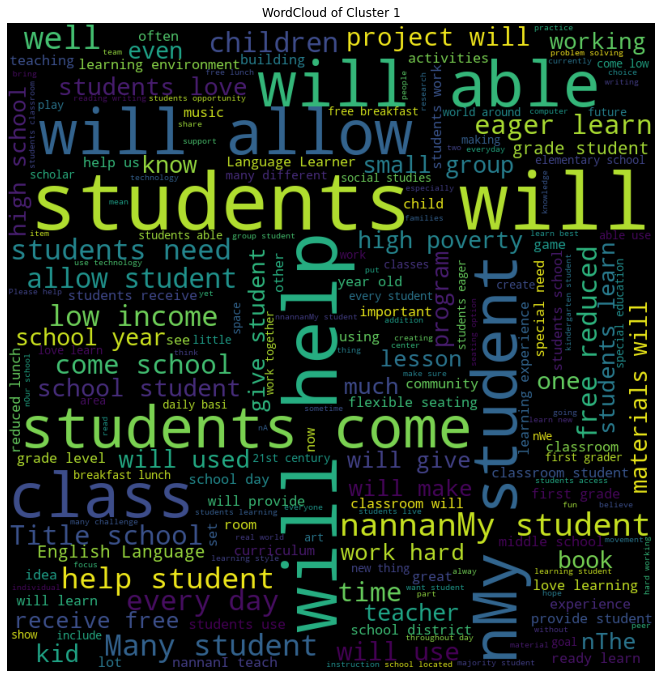

In [0]:
from wordcloud import WordCloud

cluster1_string=''
for word in cluster_1:
    cluster1_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster1_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 1') 
plt.show()

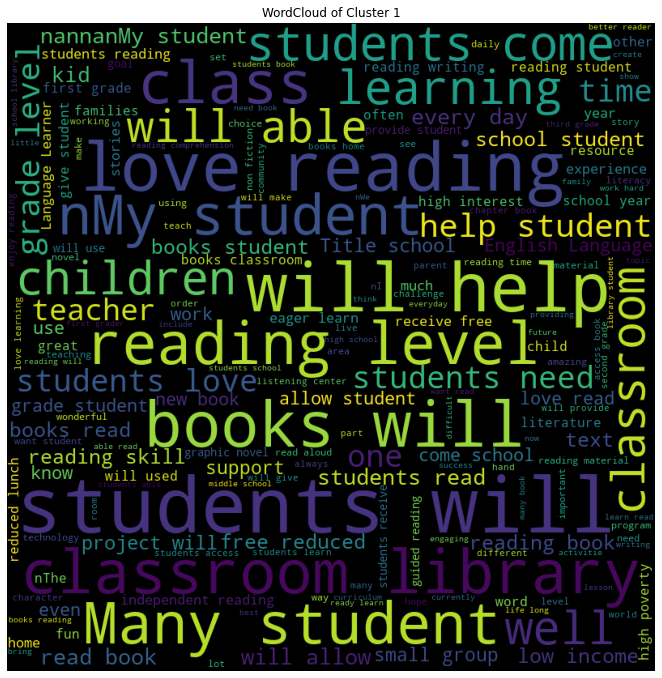

In [0]:
from wordcloud import WordCloud

cluster2_string=''
for word in cluster_2:
    cluster2_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster2_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 1') 
plt.show()

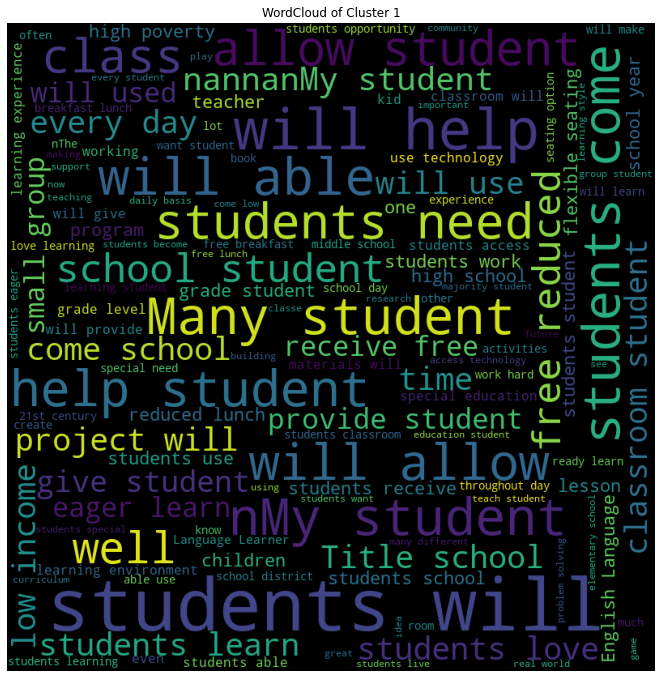

In [0]:
from wordcloud import WordCloud

cluster3_string=''
for word in cluster_3:
    cluster3_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster3_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 1') 
plt.show()

# Agglomerative Clustering:

In [0]:
X_top_feat = X_top_feat[:25000] #considering 25000 datapoints

Since clustering takes a lot of time we will be selecting top 5000 features only. For the same we will use SelectKBest from sklearn:

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
np.seterr(divide='ignore', invalid='ignore')

X_top_feat = SelectKBest(f_classif ,k=5000).fit_transform(X_set1_train, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning:

Features [   8   12   13   16   19   20   23   29   30   46   67   68   72  121
  122  123  169  171  201  202  209  215  217  220  232  235  236  237
  291  300  307  318  319  320  322  325  330  331  334  362  407  411
  452  453  454  455  456  457  461  462  464  468  473  482  483  484
  485  486  487  492  493  510  512 5701 5702 5703 5704 5705 5706 5707
 5708 5709 5710 5711 5712 5713 5714 5715 5716 5717 5718 5719 5720 5721
 5722 5723 5724 5725 5726 5727 5728 5729 5730 5731 5732 5733 5734 5735
 5736 5737 5738 5739 5740 5741 5742 5743 5744 5745 5746 5747 5748 5749
 5750 5751 5752 5753 5754 5755] are constant.



In [0]:
X_top_feat.shape

(25000, 5000)

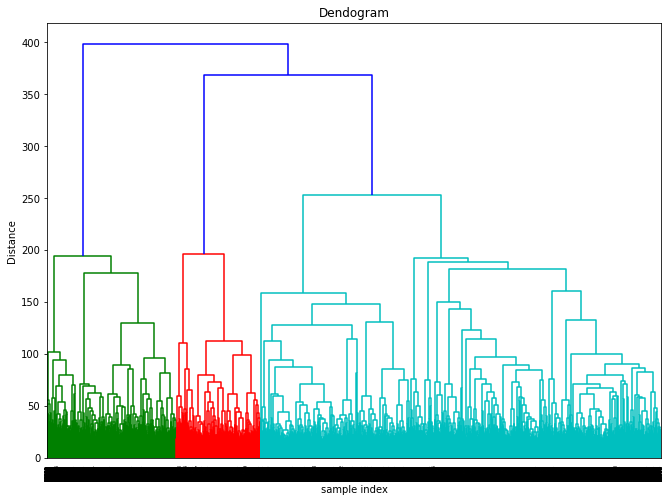

In [0]:
#
import scipy.cluster.hierarchy as hei
from scipy.cluster.hierarchy import dendrogram, linkage

#X_new_agg = X_top_feat.todense()[:5000]

#dend = dendrogram(hei.linkage(X_top_feat, method='ward'))

plt.figure(figsize=(11, 8))  
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.title("Dendogram")
dend = dendrogram(hei.linkage(X_top_feat, method='ward')) #linkage Performs hierarchical/agglomerative clustering

From above dendogram we can see there are 3 clusters.

We get an overview but to get clearer view lets look at last merged 20 clusters:

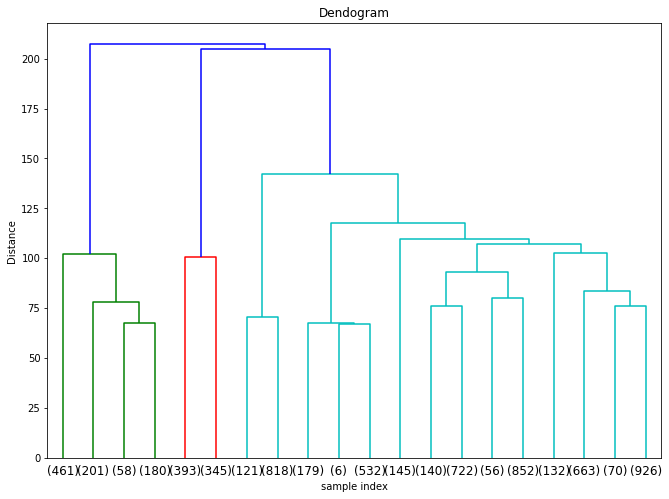

In [0]:
#https://trainingdatascience.com/workshops/hierarchical-clustering---agglomerative/
import scipy.cluster.hierarchy as hei
from scipy.cluster.hierarchy import dendrogram, linkage

#X_new_agg = X_top_feat.todense()[:5000]

#dend = dendrogram(hei.linkage(X_top_feat, method='ward'))

plt.figure(figsize=(11, 8))  
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.title("Dendogram")
dend = dendrogram(linkage(X_top_feat, method='ward'), truncate_mode='lastp', p=20) #lastp and p=20 dsiplays only 20 merged clusters

In [0]:
# https://github.com/xSachinBharadwajx/Donors_Choose_Clustering_Models/blob/master/Agglomerative_Clustering.ipynb
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X_top_feat)
test={i: np.where(cluster.labels_ == i)[0] for i in range(cluster.n_clusters)}

In [0]:
cluster_1=X['essay'].iloc[test[0]]
cluster_2=X['essay'].iloc[test[1]]
cluster_3=X['essay'].iloc[test[2]]

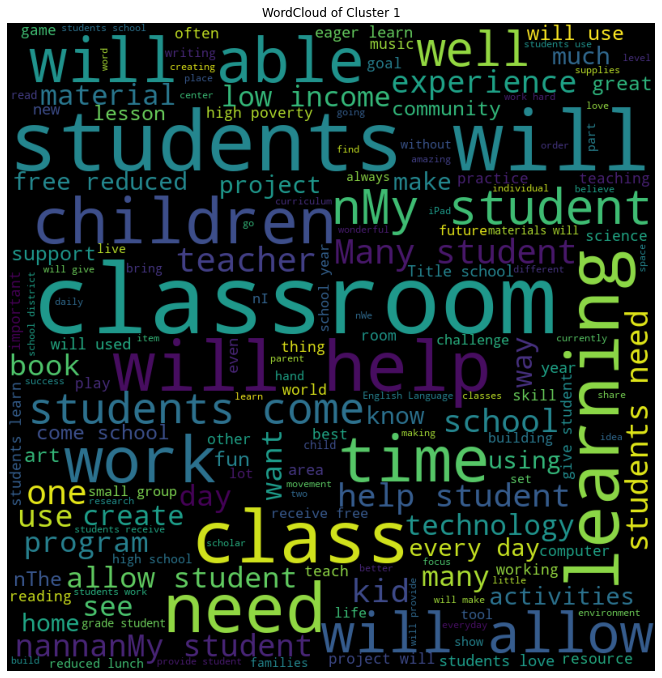

In [0]:
from wordcloud import WordCloud

cluster1_string=''
for word in cluster_1:
    cluster1_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster1_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 1') 
  
plt.show()

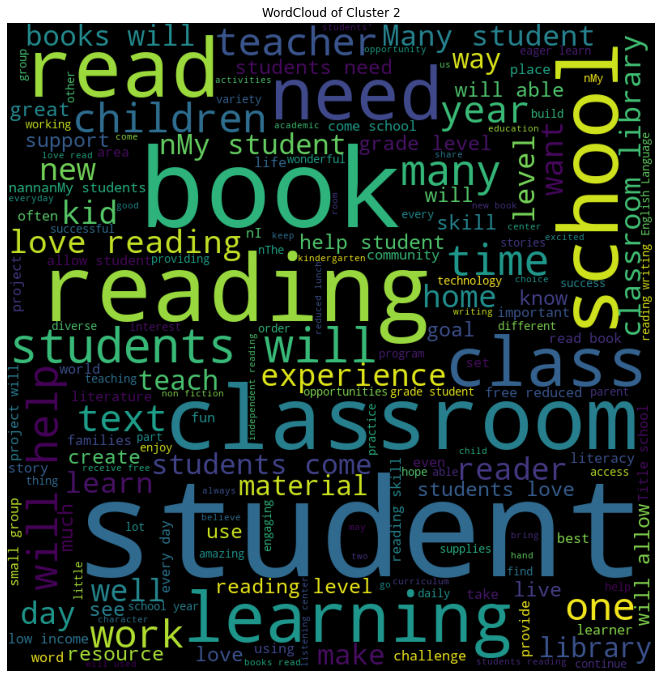

In [0]:
from wordcloud import WordCloud

cluster2_string=''
for word in cluster_2:
    cluster2_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster2_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 2') 
plt.show()

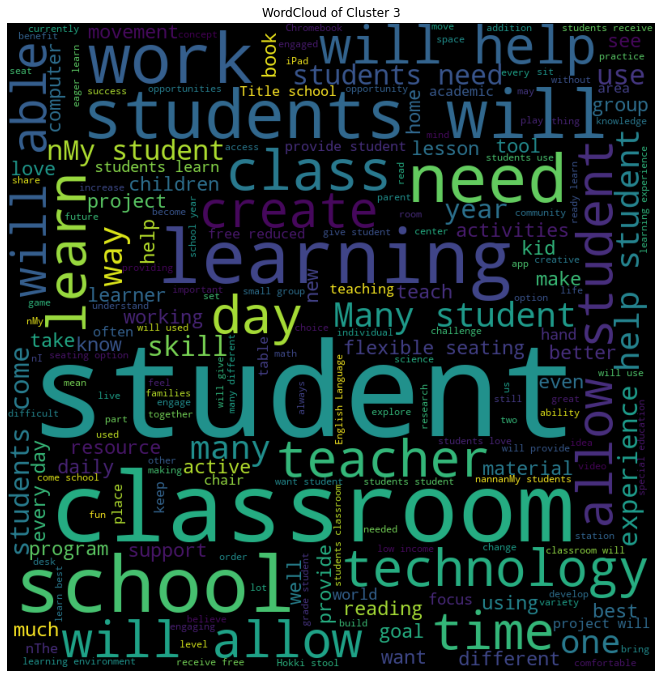

In [0]:
from wordcloud import WordCloud

cluster3_string=''
for word in cluster_3:
    cluster3_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster3_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 3') 
  
plt.show()

# DBSCAN clustering:

In [0]:
X_top_feat = X_top_feat[:10000] #considering 10k datapoints

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
np.seterr(divide='ignore', invalid='ignore')

X_top_feat = SelectKBest(f_classif ,k=5000).fit_transform(X_set1_train, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning:

Features [  11   18   19   23   27   28   32   38   39   57   61   86   87   91
  158  159  161  163  228  232  268  269  278  284  287  292  307  310
  311  312  314  376  388  400  415  416  417  420  422  425  431  432
  435  436  475  534  538  598  599  600  601  602  604  605  606  611
  612  613  616  620  628  632  641  643  644  645  646  648  650  655
  657  676  678 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863
 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877
 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891
 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905
 6906 6907] are constant.



In [0]:
import scipy
scipy.sparse.issparse(X_top_feat)

False

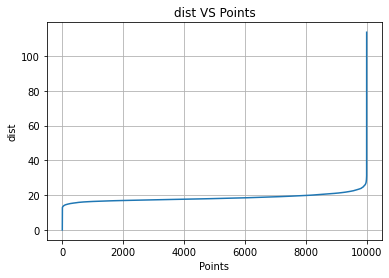

In [0]:
#https://github.com/dileepteja3/Clustering-on-Donors-choose/blob/master/dileep.teja3%40gmail.com_10.ipynb
min_points = 1500
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
datt=StandardScaler().fit_transform(X_top_feat)

distance=[]
for point in (X_top_feat):
    temp = euclidean_distances(X_top_feat, point.reshape(1, -1))
    distance.append(temp[min_points])
sorted_distance = np.sort(np.array(distance))

sorted_dist = np.sort(sorted_distance.reshape(1,-1)[0])
points = [i for i in range(len(datt))]


# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('dist')
plt.title('dist VS Points')
plt.grid()
plt.show()

In [0]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=19, n_jobs=-1)
dbscan.fit(X_top_feat)
print('No of clusters generated: ',len(set(dbscan.labels_)))

No of clusters generated:  2


In [0]:
test={i: np.where(dbscan.labels_ == i)[0] for i in range(-1,1)}   

In [0]:
len(test[0])

9892

In [0]:
len(test[-1])

108

In [0]:
cluster_1=X['essay'].iloc[test[0]]
cluster_2=X['essay'].iloc[test[-1]]

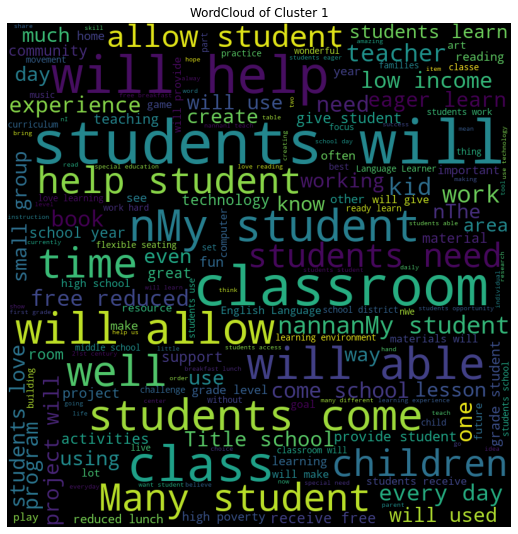

In [0]:
from wordcloud import WordCloud

cluster1_string=''
for word in cluster_1:
    cluster1_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster1_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7, 7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 1') 
plt.show()

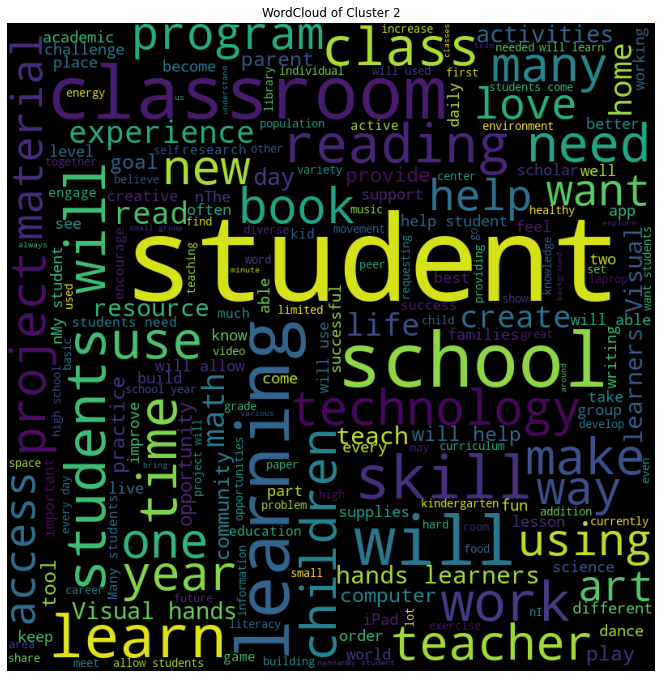

In [0]:
from wordcloud import WordCloud

cluster2_string=''
for word in cluster_2:
    cluster2_string+=word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(cluster2_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (9, 9)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud of Cluster 2') 
plt.show()

## OBSERVATION:
In Cluster 1 frequency of word 'student/students' is much more as compared to Cluster 2.

# Conclusions:

## K-Means:

1. Selected top 5000 features

2. After training the data points using Kmeans optimum value of K came out to be 'K=3' as per the plot.

3. So 3 Clusters were generated and using the essasys of data points of clusters their respective wordcloud was generated.


## Agglomerative Clustering:

1. 25000 datapoints were taken.

2. Top 5000 features were taken as the computation takes lots of time.

3. '3 clusters' were generated for which wordcloud was plotted using the essays of data points belonging to each cluster.

## DBSCAN Clustering:

1. Took 10,000 data points and top 5000 features.

2. Computed eucladean distance and plotted a 'distance vs point' graph.

3. 'Using Knee-Elbow method selected eps=19 for clustering.


4. Generated '2 clusters'  i.e points with noise and without noise.

5. Plotted 'WordCloud' for the essays of the datapoints belonging to each cluster. From which it is evident that one cluster (probably without noise) has more occurance of word 'student/students' as compared to other cluster.